In [1]:
# 경고 메시지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차 검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 다중분류를 위한 핫-윈 인코더
from keras.utils import to_categorical

# 저장된 딥러닝 모델을 복구하는 함수
from keras.models import load_model

# epoch마다 모델을 저장하는 함수
from keras.callbacks import ModelCheckpoint

# 더이상 성능 향상이 이루어지지 않는다면 조기 중단시킬 수 있는 함수
from keras.callbacks import EarlyStopping

# 저장
import pickle

# 시간 모듈
import time

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 데이터 프레임 정보 확인

In [4]:
# 결측치 확인
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 데이터 전처리

In [6]:
# 두 데이터 프레임을 합친다.
data = pd.concat((train_df, test_df))
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### PassengerId 
- 승객 일련 번호
- 1부터 1씩 증가시킨 값이므로 의미가 없다.
- 사용하지 않을 것이다

### Pclass
- 승객 등급

In [8]:
# 결측치 확인
data['Pclass'].isna().sum()

0

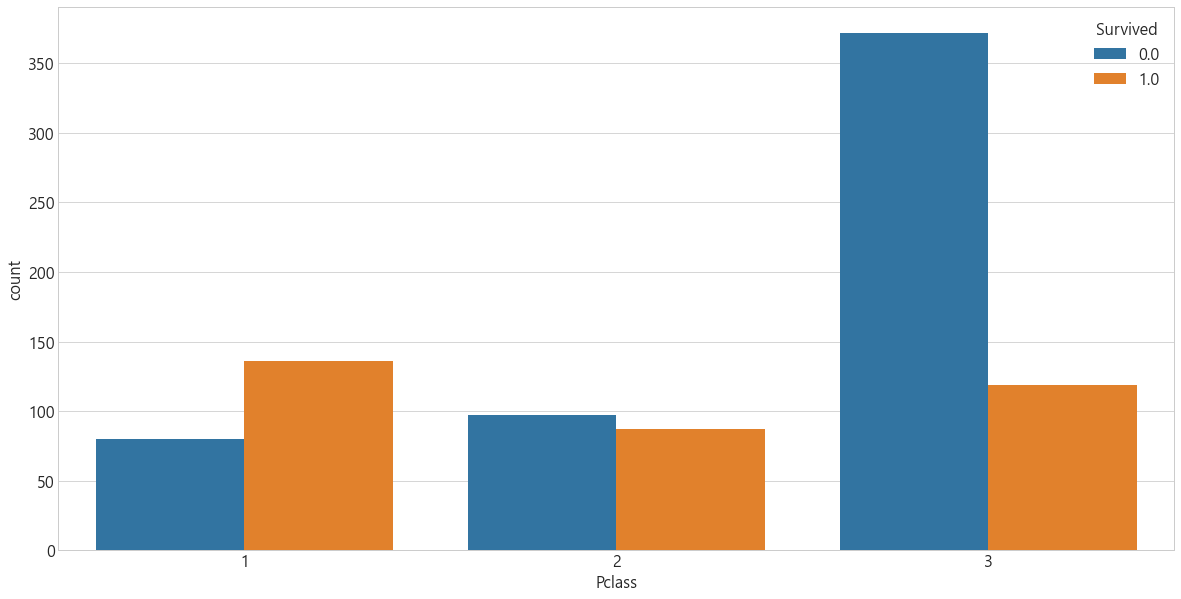

In [9]:
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.show()

1등석은 생존확률이 높고 3등석은 사망확률이 높다.

### Name : 이름

In [10]:
# LastName을 추출한다.
data['LastName'] = 0

data['LastName'] = data.Name.str.extract('([A-Za-z]+)')
data['LastName']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
413      Spector
414        Oliva
415      Saether
416         Ware
417        Peter
Name: LastName, Length: 1309, dtype: object

In [11]:
# LastName이 얼마나 있는지 확인한다.
data['LastName'].value_counts()

O             12
Andersson     11
Sage          11
Asplund        8
Goodwin        8
              ..
Ilieff         1
Maybery        1
Veal           1
Ekstrom        1
Guggenheim     1
Name: LastName, Length: 853, dtype: int64

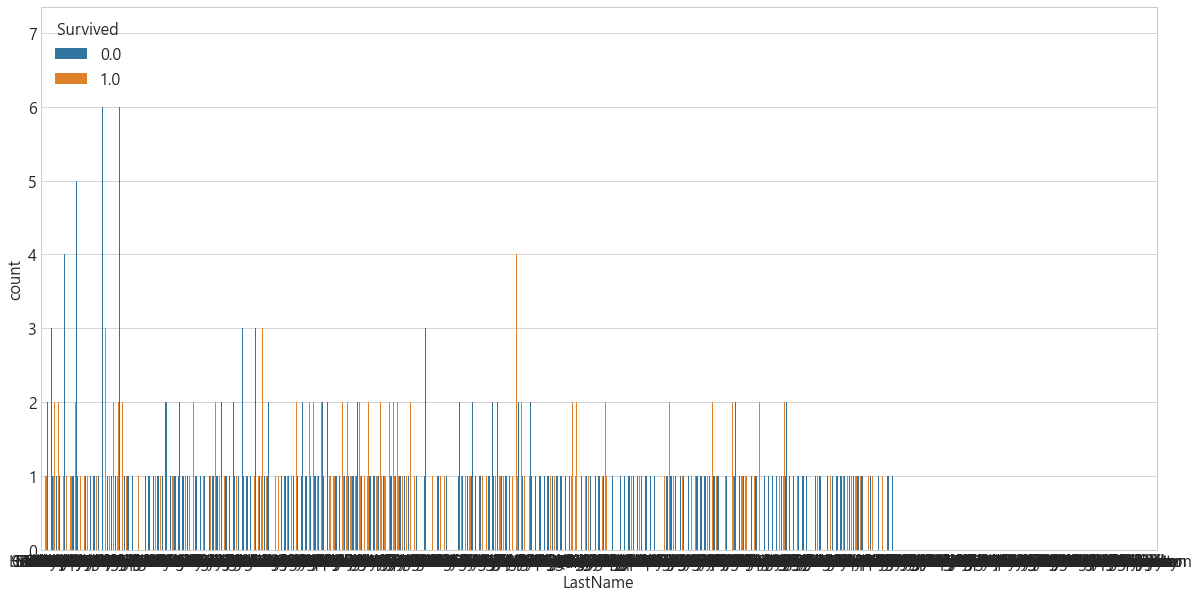

In [12]:
sns.countplot(data=data, x='LastName', hue='Survived')
plt.show()

###  Sex : 성별
- male : 남성
- female : 여성

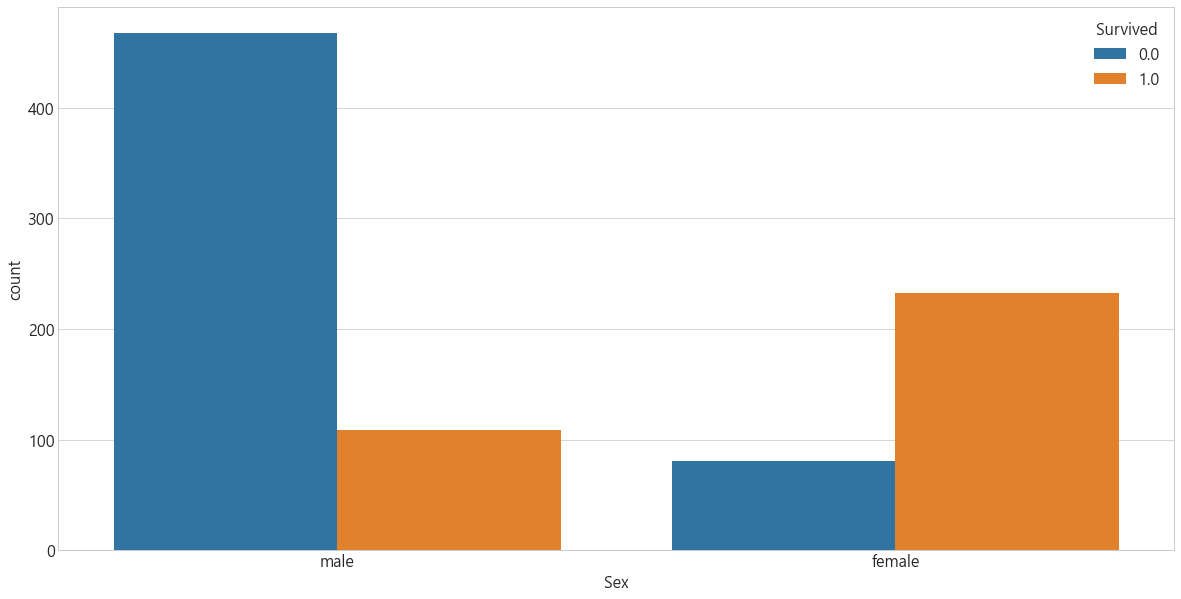

In [13]:
# 결측치 확인
sns.countplot(data=data, x='Sex', hue='Survived')
plt.show()

남성은 사망확률이 높고 여성은 생존확률이 높다.

### Age :  나이

In [14]:
# 결측치 확인
data['Age'].isna().sum()

263

In [15]:
# 이름에서 이니셜을 추출한다.
data['Initial'] = 0

data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Lady          1
Mme           1
Capt          1
Don           1
Countess      1
Dona          1
Sir           1
Jonkheer      1
Name: Initial, dtype: int64

In [16]:
# 이니셜 나이의 평균
data.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [17]:
# 인덱스를 다시 설정한다.
data = data.reset_index(drop=True)

# 이니셜별 나이 평균을 구해 결측치에 채워준다.
data['Age'] = data.groupby('Initial')['Age'].apply(lambda x : x.fillna(x.mean()))
data['Age'].isna().sum()

0

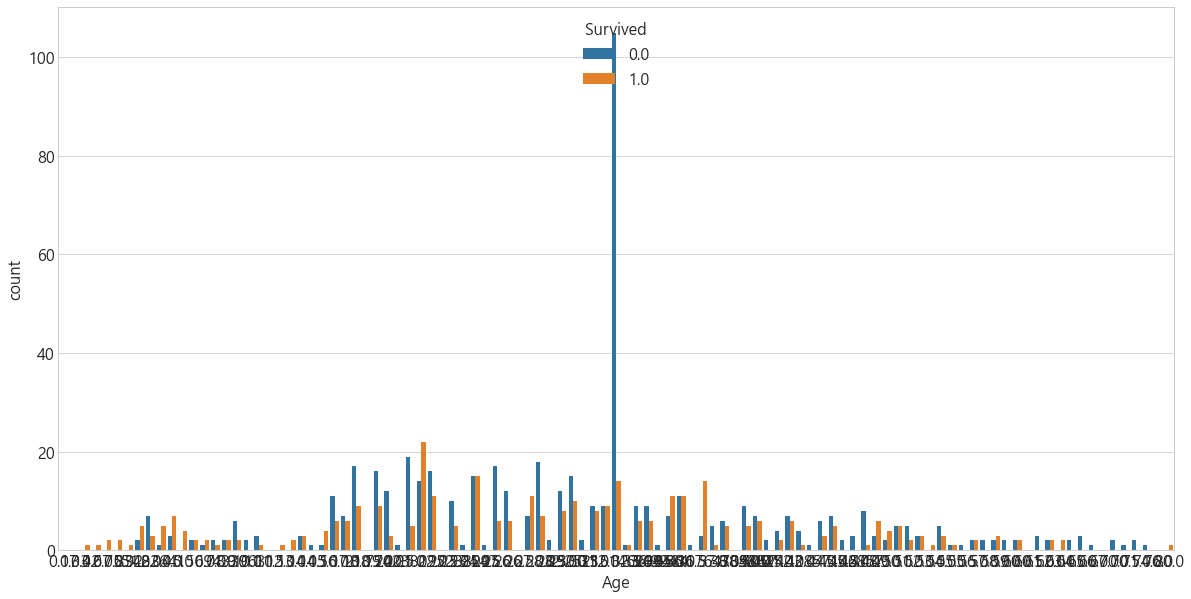

In [18]:
sns.countplot(data=data, x='Age', hue='Survived')
plt.show()

영유아의 경우 생존 확률이 높아진다.

### SibSp : 동승한 형제, 자매 수

In [19]:
data['SibSp'].isna().sum()

0

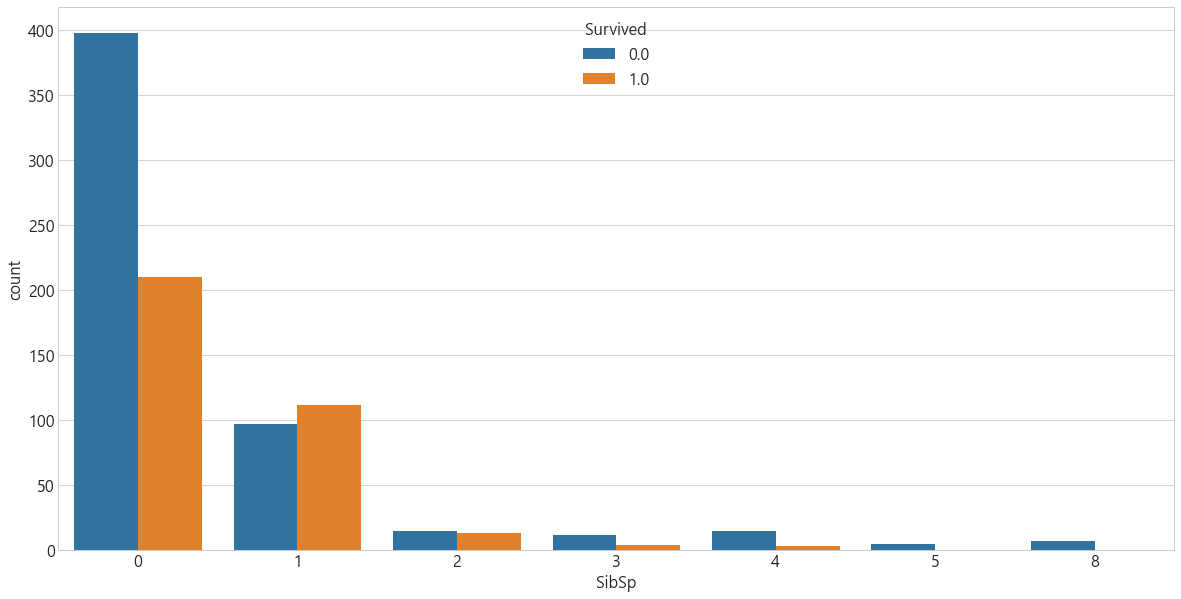

In [20]:
sns.countplot(data=data, x='SibSp', hue='Survived')
plt.show()

동승한 형제 자매가 없으면 사망률이 상승한다.

### Parch : 동승한 부모 자식 수

In [21]:
data['Parch'].isna().sum()

0

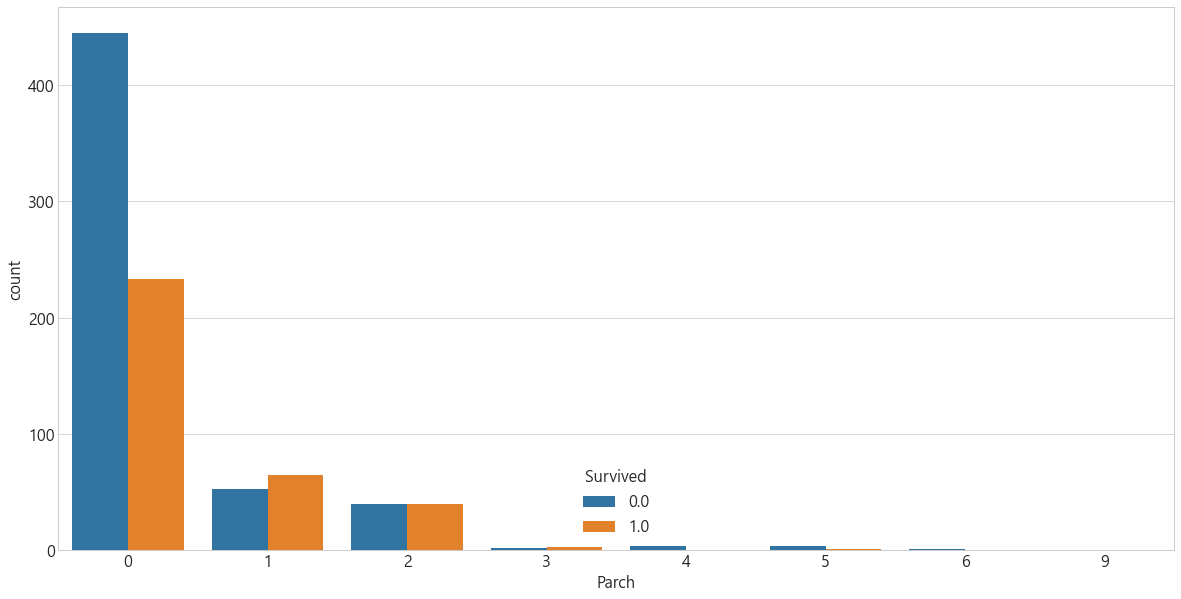

In [22]:
sns.countplot(data=data, x='Parch', hue='Survived')
plt.show()

동승한 부모 자식이 없을 경우 사망확률이 올라간다.

### Ticket : 티켓 번호

In [23]:
data['Ticket'].isna().sum()

0

In [24]:
data['Ticket'].value_counts()

CA. 2343             11
CA 2144               8
1601                  8
S.O.C. 14879          7
PC 17608              7
                     ..
21332                 1
349218                1
SOTON/O.Q. 392087     1
350417                1
350408                1
Name: Ticket, Length: 929, dtype: int64

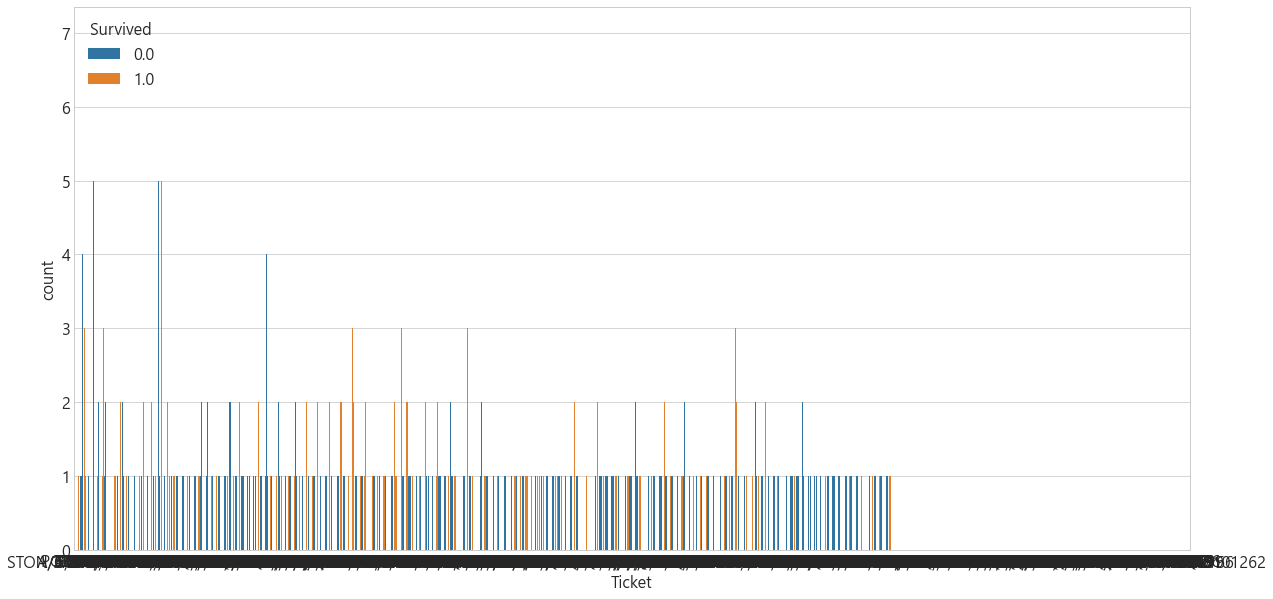

In [25]:
sns.countplot(data=data, x='Ticket', hue='Survived')
plt.show()

일부 티켓의 경우 동일한 티켓을 가진 사람들이 존재하여 티켓에 따라 사망 생존률이 다르다.

### Fare : 요금

In [26]:
data['Fare'].isna().sum()

1

In [27]:
# 요금의 전체 평균을 Fare의 결측치에 넣어 준다.
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
data['Fare'].isna().sum()

0

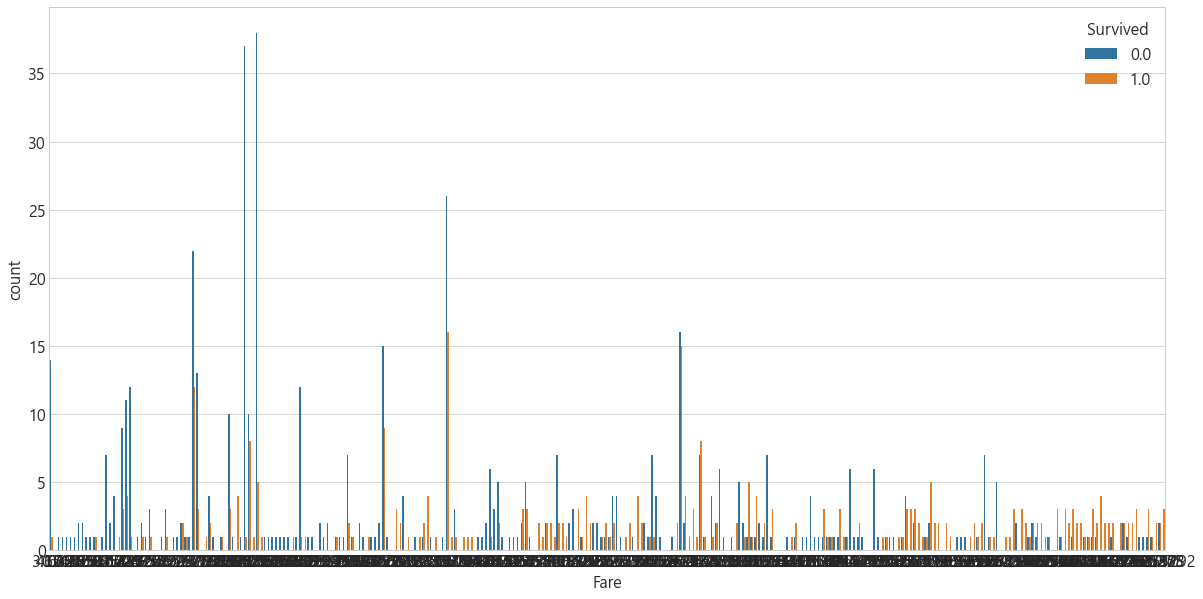

In [28]:
sns.countplot(data=data, x='Fare', hue='Survived')
plt.show()

요금이 낮을 수록 사망할 확률이 높다.

### Cabin : 객실

In [29]:
data['Cabin'].isna().sum()

1014

In [30]:
a1 = data['Cabin'].str.extract('^([A-Za-z]+)')
data['Cabin2'] = a1
data['Cabin2']

0       NaN
1         C
2       NaN
3         C
4       NaN
       ... 
1304    NaN
1305      C
1306    NaN
1307    NaN
1308    NaN
Name: Cabin2, Length: 1309, dtype: object

In [31]:
# 1등석인 사람들의 객실 정보를 확인한다.
a1 = data.query('Pclass == 1')
a2 = a1.loc[a1['Cabin'].notnull()]
a2['Cabin2'].value_counts()

C    94
B    65
D    40
E    34
A    22
T     1
Name: Cabin2, dtype: int64

In [32]:
# 2등석인 사람들의 객실 정보를 확인한다.
a1 = data.query('Pclass == 2')
a2 = a1.loc[a1['Cabin'].notnull()]
a2['Cabin2'].value_counts()

F    13
D     6
E     4
Name: Cabin2, dtype: int64

In [33]:
# 3등석인 사람들의 객실 정보를 확인한다.
a1 = data.query('Pclass == 3')
a2 = a1.loc[a1['Cabin'].notnull()]
a2['Cabin2'].value_counts()

F    8
G    5
E    3
Name: Cabin2, dtype: int64

In [34]:
# 각 등급마다 겹치는 객실이 있으므로 1등석은 X, 2등석은 Y, 3등석은 Z로
# 각각 설정해준다.
a1 = data.query('Pclass == 1')
a2 = a1.loc[a1['Cabin'].isnull()]
data.loc[a2.index, 'Cabin2'] = 'X'
data['Cabin2'].value_counts()

C    94
X    67
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Cabin2, dtype: int64

In [35]:
a1 = data.query('Pclass == 2')
a2 = a1.loc[a1['Cabin'].isnull()]
data.loc[a2.index, 'Cabin2'] = 'Y'
data['Cabin2'].value_counts()

Y    254
C     94
X     67
B     65
D     46
E     41
A     22
F     21
G      5
T      1
Name: Cabin2, dtype: int64

In [36]:
a1 = data.query('Pclass == 3')
a2 = a1.loc[a1['Cabin'].isnull()]
data.loc[a2.index, 'Cabin2'] = 'Z'
data['Cabin2'].value_counts()

Z    693
Y    254
C     94
X     67
B     65
D     46
E     41
A     22
F     21
G      5
T      1
Name: Cabin2, dtype: int64

In [37]:
data['Cabin2'].isna().sum()

0

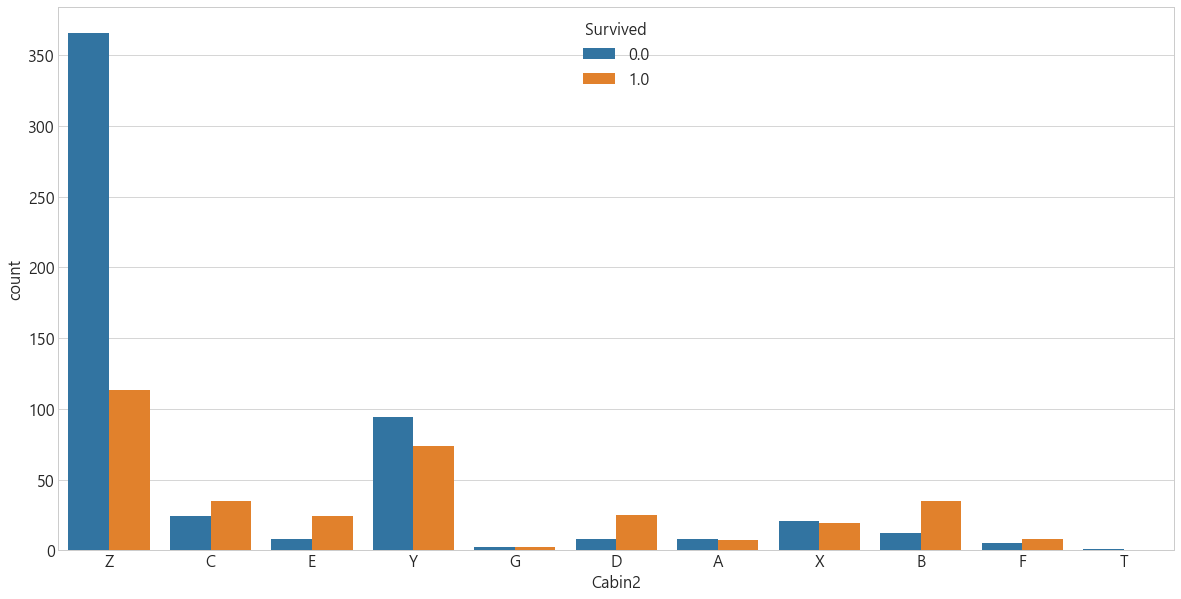

In [38]:
sns.countplot(data=data, x='Cabin2', hue='Survived')
plt.show()

3등석 객실에 해당하는 사람들의 사망확률이 높다.

### Embarked : 선착장

In [39]:
# 결측치 확인
data['Embarked'].isna().sum()

2

In [40]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [41]:
a1 = data.loc[data['Embarked'].isnull()]
data.loc[a1.index, 'Embarked'] = 'S'
data['Embarked'].isna().sum()

0

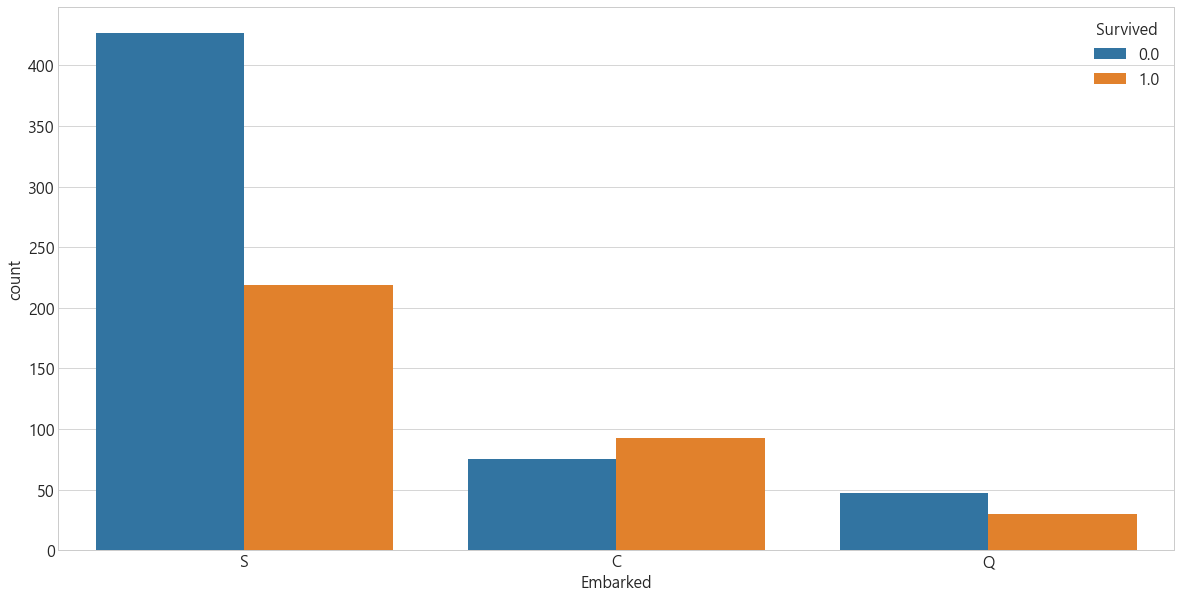

In [42]:
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.show()

S에서 탑승한 승객의 사망확률이 높다.

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Initial,Cabin2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,Z


In [44]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
LastName          0
Initial           0
Cabin2            0
dtype: int64

### 머신러닝을 위한 전처리

In [45]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Initial,Cabin2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,Z


In [46]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'LastName', 'Initial',
       'Cabin2'],
      dtype='object')

In [47]:
df1 = data.copy()
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Initial,Cabin2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Z
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva,Dona,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Z
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Z


In [48]:
# 불필요한 컬럼 제거
df1.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Cabin'], axis=1, inplace=True)
df1

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2
0,3,male,22.000000,A/5 21171,7.2500,S,Braund,Mr,Z
1,1,female,38.000000,PC 17599,71.2833,C,Cumings,Mrs,C
2,3,female,26.000000,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Z
3,1,female,35.000000,113803,53.1000,S,Futrelle,Mrs,C
4,3,male,35.000000,373450,8.0500,S,Allen,Mr,Z
...,...,...,...,...,...,...,...,...,...
1304,3,male,32.252151,A.5. 3236,8.0500,S,Spector,Mr,Z
1305,1,female,39.000000,PC 17758,108.9000,C,Oliva,Dona,C
1306,3,male,38.500000,SOTON/O.Q. 3101262,7.2500,S,Saether,Mr,Z
1307,3,male,32.252151,359309,8.0500,S,Ware,Mr,Z


In [49]:
# 가족수를 계산해서 추가해준다.
df1['FamilySize'] = data['SibSp'] + data['Parch'] + 1
df1.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize
0,3,male,22.0,A/5 21171,7.2500,S,Braund,Mr,Z,2
1,1,female,38.0,PC 17599,71.2833,C,Cumings,Mrs,C,2
2,3,female,26.0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Z,1
3,1,female,35.0,113803,53.1000,S,Futrelle,Mrs,C,2
4,3,male,35.0,373450,8.0500,S,Allen,Mr,Z,1


In [50]:
# 문자열을 숫자로 변환한다.
df1['Sex'] = df1['Sex'].factorize()[0]
df1['Ticket'] = df1['Ticket'].factorize()[0]
df1['Embarked'] = df1['Embarked'].factorize()[0]
df1['LastName'] = df1['LastName'].factorize()[0]
df1['Initial'] = df1['Initial'].factorize()[0]
df1['Cabin2'] = df1['Cabin2'].factorize()[0]
df1.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize
0,3,0,22.0,0,7.2500,0,0,0,0,2
1,1,1,38.0,1,71.2833,1,1,1,1,2
2,3,1,26.0,2,7.9250,0,2,2,0,1
3,1,1,35.0,3,53.1000,0,3,1,1,2
4,3,0,35.0,4,8.0500,0,4,0,0,1


In [51]:
# 결측치 확인
df1.isna().sum()

Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      0
LastName      0
Initial       0
Cabin2        0
FamilySize    0
dtype: int64

In [52]:
# 각 로우의 데이터를 정리한 데이터를 담는 작업을 한다.
temp = df1.copy()
temp['Survived'] = data['Survived']

In [53]:
# Pclass 생존률
temp.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [54]:
# Sex 생존률
temp.groupby('Sex')['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [55]:
# Age생존률
temp.groupby('Age')['Survived'].mean()

Age
0.17     NaN
0.33     NaN
0.42     1.0
0.67     1.0
0.75     1.0
        ... 
70.50    0.0
71.00    0.0
74.00    0.0
76.00    NaN
80.00    1.0
Name: Survived, Length: 103, dtype: float64

In [56]:
# Ticket생존률
temp.groupby('Ticket')['Survived'].mean()

Ticket
0      0.0
1      1.0
2      1.0
3      0.5
4      0.0
      ... 
924    NaN
925    NaN
926    NaN
927    NaN
928    NaN
Name: Survived, Length: 929, dtype: float64

In [57]:
# Fare생존률
temp.groupby('Fare')['Survived'].mean()

Fare
0.0000      0.066667
3.1708           NaN
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 282, dtype: float64

In [58]:
temp['Pclass'] = temp.groupby('Pclass')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0,22.000000,0,7.2500,0,0,0,0,2,0.0
1,0.629630,1,38.000000,1,71.2833,1,1,1,1,2,1.0
2,0.242363,1,26.000000,2,7.9250,0,2,2,0,1,1.0
3,0.629630,1,35.000000,3,53.1000,0,3,1,1,2,1.0
4,0.242363,0,35.000000,4,8.0500,0,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0,32.252151,926,8.0500,0,850,0,0,1,NaN
1305,0.629630,1,39.000000,273,108.9000,1,851,17,1,1,NaN
1306,0.242363,0,38.500000,927,7.2500,0,852,0,0,1,NaN
1307,0.242363,0,32.252151,928,8.0500,0,799,0,0,1,NaN


In [59]:
temp['Sex'] = temp.groupby('Sex')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,22.000000,0,7.2500,0,0,0,0,2,0.0
1,0.629630,0.742038,38.000000,1,71.2833,1,1,1,1,2,1.0
2,0.242363,0.742038,26.000000,2,7.9250,0,2,2,0,1,1.0
3,0.629630,0.742038,35.000000,3,53.1000,0,3,1,1,2,1.0
4,0.242363,0.188908,35.000000,4,8.0500,0,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,32.252151,926,8.0500,0,850,0,0,1,NaN
1305,0.629630,0.742038,39.000000,273,108.9000,1,851,17,1,1,NaN
1306,0.242363,0.188908,38.500000,927,7.2500,0,852,0,0,1,NaN
1307,0.242363,0.188908,32.252151,928,8.0500,0,799,0,0,1,NaN


In [60]:
temp['Age'] = temp.groupby('Age')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0,7.2500,0,0,0,0,2,0.0
1,0.629630,0.742038,0.454545,1,71.2833,1,1,1,1,2,1.0
2,0.242363,0.742038,0.333333,2,7.9250,0,2,2,0,1,1.0
3,0.629630,0.742038,0.611111,3,53.1000,0,3,1,1,2,1.0
4,0.242363,0.188908,0.611111,4,8.0500,0,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,926,8.0500,0,850,0,0,1,NaN
1305,0.629630,0.742038,0.357143,273,108.9000,1,851,17,1,1,NaN
1306,0.242363,0.188908,NaN,927,7.2500,0,852,0,0,1,NaN
1307,0.242363,0.188908,0.117647,928,8.0500,0,799,0,0,1,NaN


In [61]:
temp['Ticket'] = temp.groupby('Ticket')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,7.2500,0,0,0,0,2,0.0
1,0.629630,0.742038,0.454545,1.0,71.2833,1,1,1,1,2,1.0
2,0.242363,0.742038,0.333333,1.0,7.9250,0,2,2,0,1,1.0
3,0.629630,0.742038,0.611111,0.5,53.1000,0,3,1,1,2,1.0
4,0.242363,0.188908,0.611111,0.0,8.0500,0,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,8.0500,0,850,0,0,1,NaN
1305,0.629630,0.742038,0.357143,0.5,108.9000,1,851,17,1,1,NaN
1306,0.242363,0.188908,NaN,NaN,7.2500,0,852,0,0,1,NaN
1307,0.242363,0.188908,0.117647,NaN,8.0500,0,799,0,0,1,NaN


In [62]:
temp['Fare'] = temp.groupby('Fare')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0,0,0,0,2,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,1,1,1,1,2,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0,2,2,0,1,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0,3,1,1,2,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0,850,0,0,1,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,1,851,17,1,1,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0,852,0,0,1,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0,799,0,0,1,NaN


In [63]:
temp['Embarked'] = temp.groupby('Embarked')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0,0,0,2,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1,1,1,2,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,2,2,0,1,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,3,1,1,2,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,850,0,0,1,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,851,17,1,1,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,852,0,0,1,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,799,0,0,1,NaN


In [64]:
temp['LastName'] = temp.groupby('LastName')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0,0,2,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,1,1,2,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,2,0,1,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,1,1,2,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0,0,1,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,17,1,1,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0,0,1,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0,0,1,NaN


In [65]:
temp['Initial'] = temp.groupby('Initial')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0,2,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,1,2,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0,1,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,1,2,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0,1,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,1,1,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0,1,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0,1,NaN


In [66]:
temp['Cabin2'] = temp.groupby('Cabin2')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0.235908,2,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,0.593220,2,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0.235908,1,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,0.593220,2,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0.235908,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,1,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,0.593220,1,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0.235908,1,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,1,NaN


In [67]:
temp['FamilySize'] = temp.groupby('FamilySize')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0.235908,0.552795,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,0.593220,0.552795,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0.235908,0.303538,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,0.593220,0.552795,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0.235908,0.303538,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,0.593220,0.303538,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0.235908,0.303538,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN


In [68]:
# 각 로우별 통계량을 구해서 담아준다.
temp['Mean'] = 0    # 평균
temp['Max'] = 0     # 최대
temp['Min'] = 0     # 최소
temp['Social'] = 0  # 개인정보
temp['Wealth'] = 0  # 탑승정보
temp['Diff'] = 0    # 최대 - 최소

In [69]:
temp['Mean'] = temp.mean(axis=1)
temp['Max'] = temp.max(axis=1)
temp['Min'] = temp.min(axis=1)
temp['Social'] = (temp['Initial'] + temp['Sex'] + temp['Age'] + temp['FamilySize']) / 4
temp['Wealth'] = (temp['Pclass'] + temp['Ticket'] + temp['Fare'] + temp['Cabin2']) / 4
temp['Diff'] = temp['Max'] - temp['Min']
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived,Mean,Max,Min,Social,Wealth,Diff
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0.235908,0.552795,0.0,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,0.593220,0.552795,1.0,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0.235908,0.303538,1.0,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,0.593220,0.552795,1.0,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0.235908,0.303538,0.0,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.121452,0.339009,0.0,0.191692,NaN,0.339009
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,0.593220,0.303538,NaN,0.298510,0.742038,0.0,NaN,0.555712,0.742038
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.118717,0.339009,0.0,NaN,NaN,0.339009
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.121452,0.339009,0.0,0.191692,NaN,0.339009


In [70]:
# 원본에 담는다.
df1['Mean'] = temp['Mean']
df1['Max'] = temp['Max']
df1['Min'] = temp['Min']
df1['Social'] = temp['Social']
df1['Wealth'] = temp['Wealth']
df1['Diff'] = temp['Diff']

In [71]:
df1

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Mean,Max,Min,Social,Wealth,Diff
0,3,0,22.000000,0,7.2500,0,0,0,0,2,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,1,1,38.000000,1,71.2833,1,1,1,1,2,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,3,1,26.000000,2,7.9250,0,2,2,0,1,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,1,1,35.000000,3,53.1000,0,3,1,1,2,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,3,0,35.000000,4,8.0500,0,4,0,0,1,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,32.252151,926,8.0500,0,850,0,0,1,0.121452,0.339009,0.0,0.191692,NaN,0.339009
1305,1,1,39.000000,273,108.9000,1,851,17,1,1,0.298510,0.742038,0.0,NaN,0.555712,0.742038
1306,3,0,38.500000,927,7.2500,0,852,0,0,1,0.118717,0.339009,0.0,NaN,NaN,0.339009
1307,3,0,32.252151,928,8.0500,0,799,0,0,1,0.121452,0.339009,0.0,0.191692,NaN,0.339009


In [72]:
# 데이터를 준비한다.
# train 데이터의 개수
n_train = train_df.shape[0]
# test 테이터의 개수
n_test = test_df.shape[0]
# 결과 데이터
y_train = train_df['Survived'].values
# test 테이터의 승객 번호를 가져온다.
passId = test_df['PassengerId']

In [73]:
# 데이터프레임의 데이터를 한번 정리해준다.
# 각 컬럼의 값을 작은 수자부터 큰 숫자까지 0 부터 시작하는 값으로 바꾼다.
df1_enc = df1.apply(LabelEncoder().fit_transform)
df1_enc

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Mean,Max,Min,Social,Wealth,Diff
0,2,0,34,0,20,0,0,0,0,1,159,15,0,83,2,15
1,0,1,61,1,238,1,1,1,1,1,1098,34,0,266,142,34
2,2,1,41,2,50,0,2,2,0,0,838,34,0,164,78,34
3,0,1,56,3,218,0,3,1,1,1,910,34,0,285,96,34
4,2,0,56,4,52,0,4,0,0,0,325,19,0,74,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,2,0,51,926,52,0,850,0,0,0,111,0,0,7,218,0
1305,0,1,63,273,262,1,851,17,1,0,703,26,0,322,90,26
1306,2,0,62,927,20,0,852,0,0,0,102,0,0,323,181,0
1307,2,0,51,928,52,0,799,0,0,0,111,0,0,7,392,0


In [74]:
# 학습용 데이터와 예측용 데이터로 나눈다.
X_train = df1_enc[:n_train]
X_test = df1_enc[n_train:]

print(len(X_train))
print(len(X_test))

891
418


In [75]:
# 스캐일링 작업
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

display(X_train)
display(X_test)

array([[ 0.82737724, -0.73769513, -0.64936738, ..., -0.28461392,
        -1.0226415 , -0.59748916],
       [-1.56610693,  1.35557354,  0.73089689, ...,  1.59856401,
         1.79608531,  0.98469353],
       [ 0.82737724,  1.35557354, -0.29152109, ...,  0.54892385,
         0.50752448,  0.98469353],
       ...,
       [ 0.82737724,  1.35557354, -0.70048828, ...,  1.87640994,
        -1.06290902,  0.31851135],
       [-1.56610693, -0.73769513, -0.29152109, ..., -0.809434  ,
         1.67528273,  0.98469353],
       [ 0.82737724, -0.73769513,  0.168567  , ..., -0.54187867,
        -0.76090258, -0.68076193]])

array([[ 0.82737724, -0.73769513,  0.4241715 , ..., -1.09757052,
         5.11815619,  0.48505689],
       [ 0.82737724,  1.35557354,  1.39546858, ...,  0.78560742,
         5.09802242,  0.65160244],
       [-0.36936484, -0.73769513,  2.26452386, ..., -0.54187867,
         5.07788866, -0.68076193],
       ...,
       [ 0.82737724, -0.73769513,  0.78201779, ...,  2.18512763,
         2.58130206, -1.84658075],
       [ 0.82737724, -0.73769513,  0.2196879 , ..., -1.06669875,
         6.82952603, -1.84658075],
       [ 0.82737724, -0.73769513, -1.77402716, ...,  0.25049675,
         1.03100232,  0.98469353]])

### 기본 모델로 테스트

In [76]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gbc = GaussianProcessClassifier()
bag = BaggingClassifier()

In [77]:
# 사용할 알고리즘 객체들을 리스트에 담는다.
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gbc, bag]
# 각 모델별 성능을 담을 리스트
scores = []

In [78]:
# 성능 테스트
for m1 in models : 
    # 학습
    m1.fit(X_train, y_train)
    # 교차검증
    acc = cross_val_score(m1, X_train, y_train, scoring='accuracy', cv=10)
    # 교차검증에 대한 평균 성능 수치를 리스트에 담는다.
    scores.append(acc.mean())

[14:56:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:56:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [79]:
# 성능 결과를 보기위해 데이터 프레임을 생성한다.
results = pd.DataFrame({
    'Model' : ['Random Forest', 'KNN', 'Logistic Regression',
               'XGBoost', 'Gradian Boosting', 'SVC', 'Extra Trees',
               'AdaBoost', 'Gaussian Naive Bayes', 'Gausian Process',
               'Bagging Classifier'],
    'Score' : scores
})
result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df

,Model,Score
0,XGBoost,1.000000
1,AdaBoost,1.000000
2,Gaussian Naive Bayes,1.000000
3,Logistic Regression,0.998876
4,Extra Trees,0.998876
5,Bagging Classifier,0.998876
6,Random Forest,0.997753
7,SVC,0.992135
8,Gradian Boosting,0.986542
9,Gausian Process,0.986542


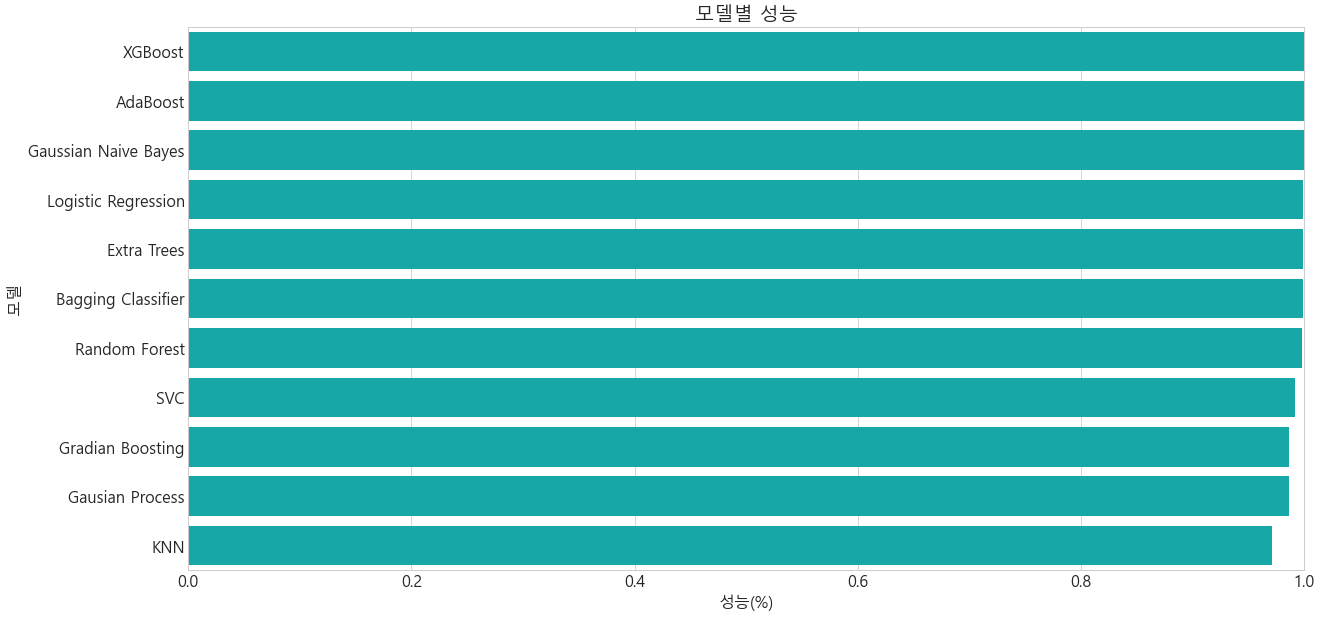

In [80]:
sns.barplot(data=result_df, x='Score', y='Model', color='c')
plt.title('모델별 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)
plt.show()

### 각 모델별 핵심 컬럼이 무엇인지 확인해 본다.

In [100]:
xgb_imp = pd.DataFrame(
    {
        'column' : df1.columns,
        'importance' : xgb.feature_importances_
    }
)
xgb_imp

,column,importance
0,Pclass,0.00000
1,Sex,0.00000
2,Age,0.00000
3,Ticket,0.00000
4,Fare,0.00000
5,Embarked,0.00000
6,LastName,0.00000
7,Initial,0.00000
8,Cabin2,0.00000
9,FamilySize,0.00000


### 미리 확인한 하이퍼 파라미터를 설정

In [101]:
ran = RandomForestClassifier(n_estimators=25,
                            max_depth=3,
                            max_features=3,
                            min_samples_leaf=2,
                            min_impurity_split=8,
                            random_state=1)

In [102]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=1,
                          n_neighbors=5, weights='uniform')

In [104]:
log = LogisticRegression(C=2.7825594022071245, penalty='l2')

In [105]:
xgb = XGBClassifier(learning_rate=0.0001, n_estimators=10, random_state=1)

In [106]:
gbc = GradientBoostingClassifier(learning_rate=0.0005, n_estimators=1250,
                                random_state=1)

In [107]:
svc = SVC(probability=True)

In [108]:
ext = ExtraTreesClassifier(max_depth=None, max_features=3,
                          min_samples_leaf=2, min_samples_split=8,
                          n_estimators=10, random_state=1)

In [109]:
ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=1)

In [110]:
gpc = GaussianProcessClassifier()

In [111]:
bag = BaggingClassifier(random_state=1)

In [112]:
# 사용할 알고리즘 객체들을 리스트에 담는다.
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gpc, bag]
# 각 모델별 성능을 담을 리스트
scores = []

# 성능 테스트
for m1 in models : 
    # 학습
    m1.fit(X_train, y_train)
    # 교차검증
    acc = cross_val_score(m1, X_train, y_train, scoring='accuracy', cv=10)
    # 교차검증에 대한 평균 성능 수치를 리스트에 담는다.
    scores.append(acc.mean())

# 성능 결과를 보기위해 데이터 프레임을 생성한다.
results = pd.DataFrame({
    'Model' : ['Random Forest', 'KNN', 'Logistic Regression',
               'XGBoost', 'Gradian Boosting', 'SVC', 'Extra Trees',
               'AdaBoost', 'Gausian Process',
               'Bagging Classifier'],
    'Score' : scores
})
result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df

[15:17:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:17:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Model,Score
0,XGBoost,1.000000
1,Gradian Boosting,1.000000
2,AdaBoost,1.000000
3,Bagging Classifier,1.000000
4,Logistic Regression,0.998876
5,Extra Trees,0.996629
6,SVC,0.992135
7,Gausian Process,0.986542
8,KNN,0.970824
9,Random Forest,0.616167


### 보팅
- 다수의 알고리즘이 던지는 결과를 취합하여 최종 예측한다.
- soft voting : 각 알고리즘이 던지는 예측 결과 확률을 취합해서 확률이 높은걸 선택
- hard voting : 각 알고리즘이 던지는 예측 결과 값을 취합해서 가장 많이 나온 것을 선택

In [114]:
# 하드보팅
a1 = [
    ('model1', ran), ('model2', knn), ('model3', log), ('model4', xgb), 
    ('model5', gbc), ('model6', svc), ('model7', ext), ('model8', ada),
    ('model9', gpc), ('model10', bag)
]
voting1 = VotingClassifier(estimators=a1, voting='hard')

result = cross_val_score(voting1, X_train, y_train, cv=10)
result.mean()

[15:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

1.0

In [115]:
# 소프트보팅
a1 = [
    ('model1', ran), ('model2', knn), ('model3', log), ('model4', xgb), 
    ('model5', gbc), ('model6', svc), ('model7', ext), ('model8', ada),
    ('model9', gpc), ('model10', bag)
]
voting2 = VotingClassifier(estimators=a1, voting='soft')

result = cross_val_score(voting2, X_train, y_train, cv=10)
result.mean()

[15:41:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

1.0

### Deep Learning

In [139]:
# seed 설정
np.random.seed(3)
tf.random.set_seed(3)

In [140]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [141]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [142]:
# 모델 저장 조건
modelpath = 'models/{epoch}-{val_loss}.hdf5'
callback1 = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [143]:
# 자동 중단 설정
callback2 = EarlyStopping(monitor='val_loss', patience=100)

In [144]:
# 모델 실행
model.fit(X_train, y_train, validation_split=0.2, epochs=100000, batch_size=50,
         callbacks=[callback1, callback2])

Epoch 1/100000
15/15 [==============================] - 1s 14ms/step - loss: 0.5954 - accuracy: 0.7301 - val_loss: 0.4885 - val_accuracy: 0.8324

Epoch 00001: val_loss improved from inf to 0.48850, saving model to models\1-0.48850053548812866.hdf5
Epoch 2/100000
15/15 [==============================] - 0s 6ms/step - loss: 0.4783 - accuracy: 0.8475 - val_loss: 0.3846 - val_accuracy: 0.8771

Epoch 00002: val_loss improved from 0.48850 to 0.38457, saving model to models\2-0.38456931710243225.hdf5
Epoch 3/100000
15/15 [==============================] - 0s 6ms/step - loss: 0.4064 - accuracy: 0.8803 - val_loss: 0.3187 - val_accuracy: 0.8883

Epoch 00003: val_loss improved from 0.38457 to 0.31873, saving model to models\3-0.3187345266342163.hdf5
Epoch 4/100000
15/15 [==============================] - 0s 6ms/step - loss: 0.3448 - accuracy: 0.9149 - val_loss: 0.2726 - val_accuracy: 0.9274

Epoch 00004: val_loss improved from 0.31873 to 0.27259, saving model to models\4-0.2725938558578491.hdf5
E


Epoch 00033: val_loss improved from 0.04927 to 0.04798, saving model to models\33-0.047976456582546234.hdf5
Epoch 34/100000
15/15 [==============================] - 0s 7ms/step - loss: 0.0304 - accuracy: 0.9975 - val_loss: 0.0469 - val_accuracy: 0.9832

Epoch 00034: val_loss improved from 0.04798 to 0.04687, saving model to models\34-0.046872176229953766.hdf5
Epoch 35/100000
15/15 [==============================] - 0s 7ms/step - loss: 0.0353 - accuracy: 0.9964 - val_loss: 0.0460 - val_accuracy: 0.9832

Epoch 00035: val_loss improved from 0.04687 to 0.04597, saving model to models\35-0.045972034335136414.hdf5
Epoch 36/100000
15/15 [==============================] - 0s 8ms/step - loss: 0.0274 - accuracy: 0.9984 - val_loss: 0.0454 - val_accuracy: 0.9832

Epoch 00036: val_loss improved from 0.04597 to 0.04540, saving model to models\36-0.04539726674556732.hdf5
Epoch 37/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0295 - accuracy: 0.9964 - val_loss: 0.0440 - val_ac

Epoch 103/100000
15/15 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9888

Epoch 00103: val_loss improved from 0.02964 to 0.02961, saving model to models\103-0.02960938960313797.hdf5
Epoch 104/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9888

Epoch 00104: val_loss did not improve from 0.02961
Epoch 105/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9888

Epoch 00105: val_loss did not improve from 0.02961
Epoch 106/100000
15/15 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9888

Epoch 00106: val_loss did not improve from 0.02961
Epoch 107/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9888

Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9888

Epoch 00185: val_loss did not improve from 0.02961
Epoch 186/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9888

Epoch 00186: val_loss did not improve from 0.02961
Epoch 187/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9888

Epoch 00187: val_loss did not improve from 0.02961
Epoch 188/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9888

Epoch 00188: val_loss did not improve from 0.02961
Epoch 189/100000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 0.9888

Epoch 00189: val_loss did not improve from 0.02961
Epoch 190/100000
15/15 [===

In [138]:
r1 = model.evaluate(X_train, y_train)[1]
r1

28/28 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9978


0.9977553486824036

In [145]:
# 예측 결과 추출
best_model = load_model('models/103-0.02960938960313797.hdf5')
best_model

In [146]:
result = (model.predict(X_test) > 0.5).astype('int32')
result

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [147]:
# 저장
test_df['Survived'] = result
test_df.to_csv('titanic_deep_learning.csv')